In [1]:
%matplotlib widget
from CG import *

In [2]:
A = np.matrix([[3.0, 2.0], [2.0, 6.0]])
b = np.matrix([[2.0], [-8.0]])
c = 0.0

## 9. Convergence Analysis of Conjugate Gradients <a id="9"></a>

CG is complete after $n$ iterations, so why should we care about convergence analysis? In practice, accumulated floating point roundoff error causes the residual to gradually lose accuracy, and cancellation error causes the search vectors to lose $A$-orthogonality. The former problem could be dealt with as it was for Steepest Descent, but the latter problem is not easily curable. Because of this loss of conjugacy, the mathematical community discarded CG during the 1960s, and interest only resurged when evidence for its effectiveness as an iterative procedure was published in the seventies.

Times have changed, and so has our outlook. Today, convergence analysis is important because CG is commonly used for problems so large it is not feasible to run even $n$ iterations. Convergence analysis is seen less as a ward against floating point error, and more as a proof that CG is useful for problems that are out of the reach of any exact algorithm.

The first iteration of CG is identical to the first iteration of Steepest Descent, so without changes, Section 6.1 describes the conditions under which CG converges on the first iteration.

### 9.1. Picking Perfect Polynomials <a id="9.1"></a>

We have seen that at each step of CG, the value $e_{[i]}$ is chosen from $e_{[0]} + \mathcal{D}_i$ , where 

\begin{align*}
\mathcal{D}_i &= \text{span}\{r_{[0]}, Ar_{[0]}, A^2r_{[0]}, \dots, A^{i-1}r_{[0]} \} \\
&= \text{span}\{Ae_{[0]}, A^2e_{[0]}, A^3e_{[0]}, \dots, A^ie_{[0]}\}
\end{align*}

Krylov subspaces such as this have another pleasing property. For a fixed $i$, the error term has the form

$$
e_{[i]} = \left(I+\sum^i_{j=1}\psi_jA^j\right)e_{[0]}.
$$

The coefficients $\psi_i$ are related to the values $\alpha_i$ and $\beta_i$, but the precise relationship is not important here. What *is* important is the proof in Section 7.3 that CG chooses the $\psi_i$ coefficients that minimize $\|e_{[i]}\|_A$.

The expression in parentheses above can be expressed as a polynomial. Let $P_i(\lambda)$ be a polynomial of degree $i$. $P_i$ can take either a scalar or a matrix as its argument, and will evaluate to the same; for instance, if $P_2(\lambda) = 2\lambda^2 + 1$, then $P_2(A) = 2 A^2 + I$. This flexible notation comes in handy for eigenvectors, for which you should convince yourself that $P_i(A)v = P_i(\lambda)v$. (Note that $Av = \lambda v, A^2v = \lambda^2 v$, and so on.)

Now we can express the error term as

$$
e_{[i]} = P_i(A)e_{[0]},
$$

if we require that $P_i(0) = 1$. CG chooses this polynomial when it chooses the $\psi_i$ coefficients. Let’s examine the effect of applying this polynomial to $e_{[0]}$. As in the analysis of Steepest Descent, express $e_{[0]}$ as a linear combination of orthogonal unit eigenvectors

$$
e_{[0]} = \sum^n_{j=1} \xi_j v_j,
$$

and we find that

\begin{align*}
e_{[i]} &= \sum_j \xi_j P_i(\lambda_j) v_j \\
Ae_{[i]} &= \sum_j \xi_j P_i(\lambda_j) \lambda_j v_j \\
\|e_{[i]}\|^2_A &= \sum_j \xi^2_j \left[ P_i(\lambda_j) \right]^2 \lambda_j.
\end{align*}

CG finds the polynomial that minimizes this expression, but convergence is only as good as the convergence of the worst eigenvector. Letting $\Lambda(A)$ be the set of eigenvalues of $A$, we have

\begin{align*}
\|e_{[i]}\|^2_A &\leq \min_{P_i} \max_{\lambda \in \Lambda(A)} \left[ P_i(\lambda) \right]^2 \sum_j \xi^2_j \lambda_j \\
&= \min_{P_i} \max_{\lambda \in \Lambda(A)} \left[ P_i(\lambda) \right]^2 \|e_{[0]}\|^2_A. \tag{50}
\end{align*}

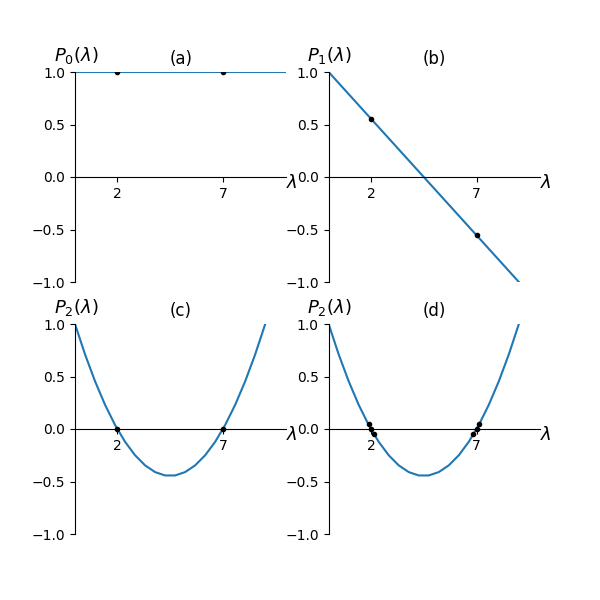

In [3]:
fig31()

<center>Figure 31: The convergence of CG after $i$ iterations depends on how close a polynomial $P_i$ of degree $i$ can be to zero on each eigenvalue, given the constraint that $P_i(0) = 1$.</center>

Figure 31 illustrates, for several values of $i$, the $P_i$ that minimizes this expression for our sample problem
with eigenvalues 2 and 7. There is only one polynomial of degree zero that satisfies $P_0(0) = 1$, and that is $P_0(\lambda) = 1$, graphed in Figure 31(a). The optimal polynomial of degree one is $P_1(\lambda) = 1 - 2x/9$, graphed in Figure 31(b). Note that $P_1(2) = 5/9$ and $P_1(7) = -5/9$, and so the energy norm of the error term after one iteration of CG is no greater than 5/9 its initial value. Figure 31(c) shows that, after two iterations, Equation 50 evaluates to zero. This is because a polynomial of degree two can be fit to three points ($P_2(0) = 1, P_2(2) = 0,$ and $P_2(7) = 0$). In general, a polynomial of degree $n$ can fit $n+1$ points, and thereby accommodate separate eigenvalues.

The foregoing discussing reinforces our understanding that CG yields the exact result after iterations; and furthermore proves that CG is quicker if there are duplicated eigenvalues. Given infinite floating point precision, the number of iterations required to compute an exact solution is at most the number of distinct eigenvalues. (There is one other possibility for early termination: $x_{[0]}$ may already be $A$-orthogonal to some of the eigenvectors of $A$. If eigenvectors are missing from the expansion of $x_{[0]}$ , their eigenvalues may be omitted from consideration in Equation 50. Be forewarned, however, that these eigenvectors may be reintroduced by floating point roundoff error.)

We also find that CG converges more quickly when eigenvalues are clustered together (Figure 31(d)) than when they are irregularly distributed between $\lambda_{min}$ and $\lambda_{max}$, because it is easier for CG to choose a polynomial that makes Equation 50 small.

If we know something about the characteristics of the eigenvalues of $A$, it is sometimes possible to suggest a polynomial that leads to a proof of a fast convergence. For the remainder of this analysis, however, I shall assume the most general case: the eigenvalues are evenly distributed between $\lambda_{min}$ and $\lambda_{max}$, the number of distinct eigenvalues is large, and floating point roundoff occurs.

### 9.2. Chebyshev Polynomials <a id="9.2"></a>

A useful approach is to minimize Equation 50 over the range $[\lambda_{min}, \lambda_{max}]$ rather than at a finite number of points. The polynomials that accomplish this are based on Chebyshev polynomials.

The Chebyshev polynomial of degree is

$$
T_i(\omega) = \frac{1}{2} \left[ (\omega + \sqrt{\omega^2 - 1})^i + (\omega - \sqrt{\omega^2 - 1})^i \right].
$$

(If this expression doesn’t look like a polynomial to you, try working it out for $i$ equal to 1 or 2.) Several Chebyshev polynomials are illustrated in Figure 32. The Chebyshev polynomials have the property that $|T_i(\omega)| \leq 1$ (in fact, they oscillate between 1 and -1) on the domain $\omega \in [-1,1]$, and furthermore that $|T_i(\omega)|$ is maximum on the domain $\omega \not\in [-1, 1]$ among all such polynomials. Loosely speaking, $|T_i(\omega)|$ increases as quickly as possible outside the boxes in the illustration.

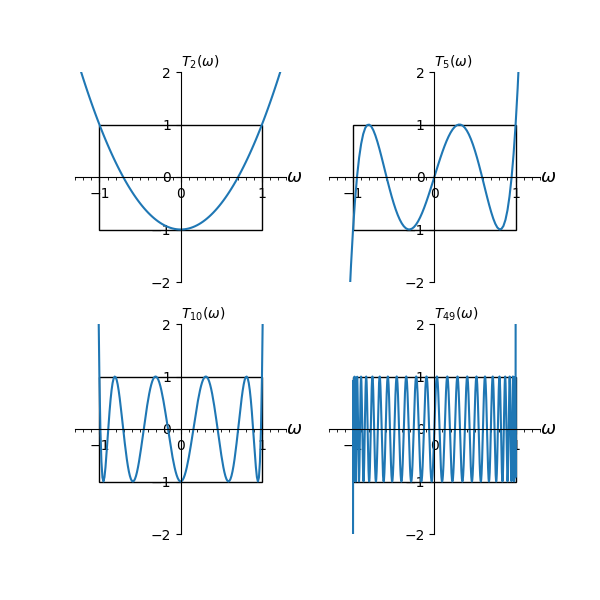

In [4]:
fig32()

<center>Figure 32: Chebyshev polynomials of degree 2, 5, 10, and 49.</center>

It is shown in Appendix C3 that Equation 50 is minimized by choosing

$$
P_i(\lambda) = \frac{T_i \left( \frac{\lambda_{max} + \lambda_{min} -2\lambda}{\lambda_{max}-\lambda_{min}}  \right)}
{T_i \left( \frac{\lambda_{max} + \lambda_{min}}{\lambda_{max}-\lambda_{min}}  \right)}.
$$


This polynomial has the oscillating properties of Chebyshev polynomials on the domain $\lambda_{min} \leq \lambda \leq \lambda_{max}$ (see Figure 33). The denominator enforces our requirement that $P_i(0) = 1$. The numerator has a maximum value of one on the interval between $\lambda_{min}$ and $\lambda_{max}$, so from Equation 50 we have

\begin{align*}
\|e_{[i]}\|_A &\leq T_i \left( \frac{\lambda_{max}+\lambda_{min}}{\lambda_{max}-\lambda_{min}} \right)^{-1} \|e_{[0]}\|_A \\
&= T_i \left( \frac{\kappa + 1}{\kappa - 1} \right)^{-1} \|e_{[0]}\|_A \\
&= 2 \left[ \left( \frac{\sqrt{\kappa} + 1}{\sqrt{\kappa} - 1} \right)^i + \left( \frac{\sqrt{\kappa} - 1}{\sqrt{\kappa} + 1} \right)^i \right]^{-1} \|e_{[0]}\|_A. \tag{51}
\end{align*}

The second addend inside the square brackets converges to zero as $i$ grows, so it is more common to express the convergence of CG with the weaker inequality

\begin{align*}
\|e_{[i]}\|_A &\leq 2 \left( \frac{\sqrt{\kappa} - 1}{\sqrt{\kappa} + 1} \right)^i  \|e_{[0]}\|_A. \tag{52}
\end{align*}

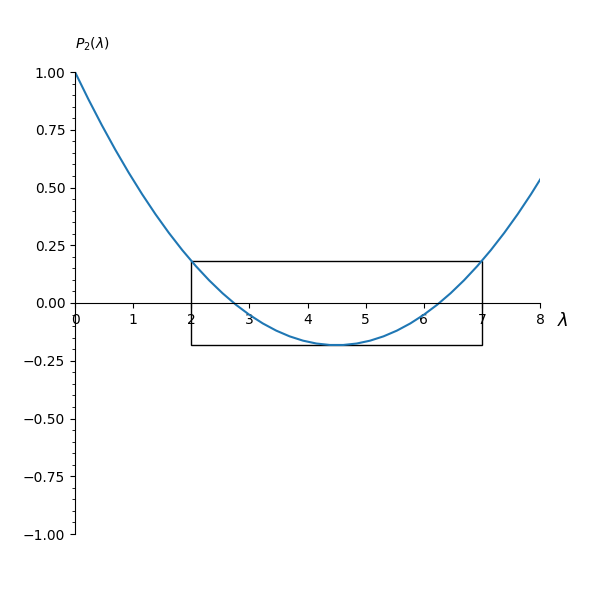

In [5]:
fig33()

<center>Figure 33: The polynomial $P_2(\lambda)$ that minimizes Equation 50 for $\lambda_{min} = 2$ and $\lambda_{max} = 7$ in the general case. This curve is a scaled version of the Chebyshev polynomial of degree 2. The energy norm of the error term after two iterations is no greater than 0.183 times its initial value. Compare with Figure 31(c), where it is known that there are only two eigenvalues.</center>

The first step of CG is identical to a step of Steepest Descent. Setting $i=1$ in Equation 51, we obtain Equation 28, the convergence result for Steepest Descent. This is just the linear polynomial case illustrated in Figure 31(b).

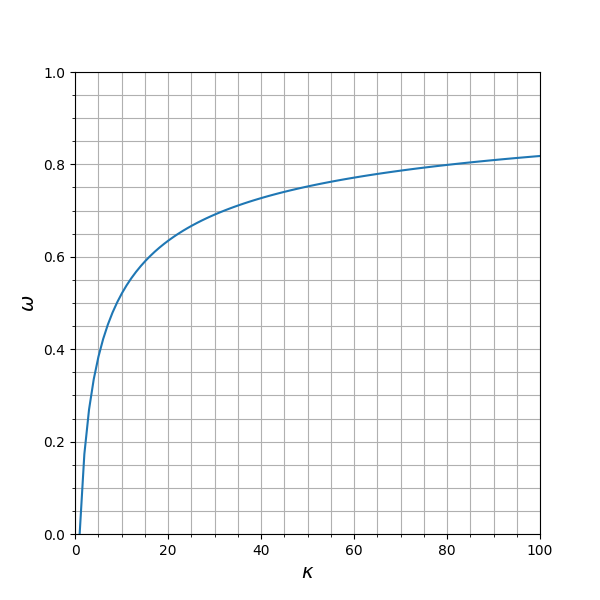

In [6]:
fig34()

<center>Figure 34: Convergence of Conjugate Gradients (per iteration) as a function of condition number. Compare with Figure 20.</center>

Figure 34 charts the convergence per iteration of CG, ignoring the lost factor of 2. In practice, CG usually converges faster than Equation 52 would suggest, because of good eigenvalue distributions or good starting points. Comparing Equations 52 and 28, it is clear that the convergence of CG is much quicker than that of Steepest Descent (see Figure 35). However, it is not necessarily true that every iteration of CG enjoys faster convergence; for example, the first iteration of CG is an iteration of Steepest Descent. The factor of 2 in Equation 52 allows CG a little slack for these poor iterations.

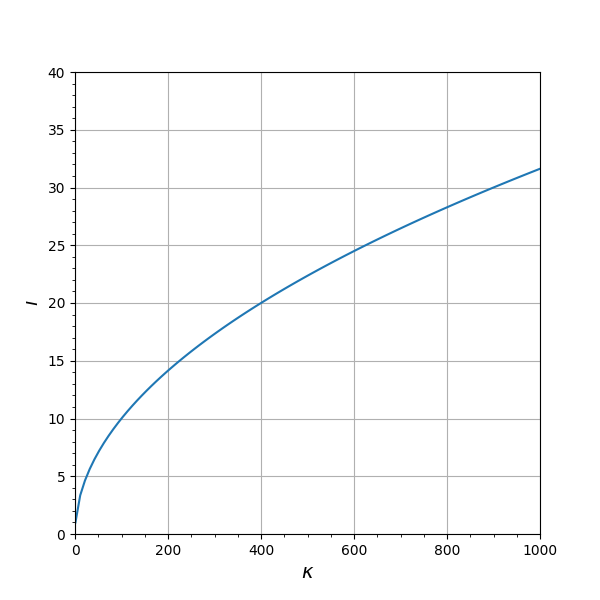

In [7]:
fig35()

<center>Figure 35: Number of iterations of Steepest Descent required to match one iteration of CG.</center>

Next: [10. Complexity](CG10.ipynb)